In [ ]:
!pip install wandb

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from google.colab import files
import io

In [11]:
wandb.init(project='Weather History')

In [59]:
config = wandb.config
config.learning_rate = 0.001

### Data

In [13]:
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [16]:
data = pd.read_csv(io.BytesIO(uploaded['weatherHistory.csv']))
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [17]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

data['Year'] = data['Formatted Date'].dt.year 
data['Day Of Year'] = data['Formatted Date'].dt.dayofyear
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Day Of Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91


In [18]:
temp_of_day = data.groupby(['Year', 'Day Of Year'])['Temperature (C)'].mean().reset_index()
temp_of_day

,Year,Day Of Year,Temperature (C)
0,2005,365,0.577778
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852
...,...,...,...
4014,2016,362,0.278009
4015,2016,363,0.222222
4016,2016,364,0.167824
4017,2016,365,0.117593


In [19]:
X = temp_of_day['Day Of Year'].values
Y = temp_of_day['Temperature (C)'].values
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

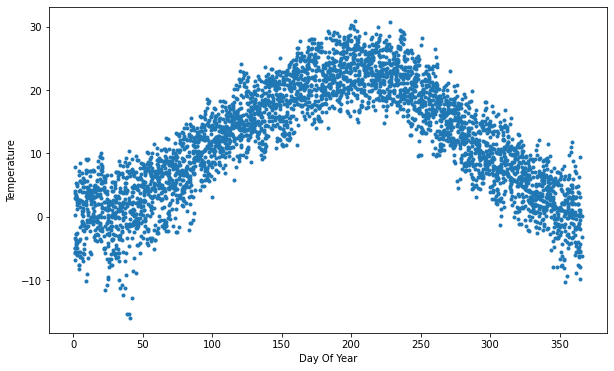

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker= '.')
plt.xlabel('Day Of Year')
plt.ylabel('Temperature')
plt.show()

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

### Model

In [92]:
model = tf.keras.models.Sequential([
    Dense(300, input_dim=1, activation='sigmoid'), # HL1
    Dense(224, activation='sigmoid'), # HL2
    Dense(1, activation='linear') # OL
])

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
             loss=tf.keras.losses.MeanSquaredError())

In [94]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 300)               600       
                                                                 
 dense_56 (Dense)            (None, 224)               67424     
                                                                 
 dense_57 (Dense)            (None, 1)                 225       
                                                                 
Total params: 68,249
Trainable params: 68,249
Non-trainable params: 0
_________________________________________________________________


### Train

In [95]:
model.fit(X_train, Y_train, epochs=120, callbacks=[WandbCallback()])

Epoch 1/120
95/95 [==============================] - 1s 4ms/step - loss: 83.0866
Epoch 2/120
95/95 [==============================] - 0s 4ms/step - loss: 52.1275
Epoch 3/120
95/95 [==============================] - 0s 4ms/step - loss: 50.5013
Epoch 4/120
95/95 [==============================] - 0s 4ms/step - loss: 49.8548
Epoch 5/120
95/95 [==============================] - 0s 4ms/step - loss: 49.4993
Epoch 6/120
95/95 [==============================] - 0s 4ms/step - loss: 48.5698
Epoch 7/120
95/95 [==============================] - 0s 4ms/step - loss: 46.1014
Epoch 8/120
95/95 [==============================] - 0s 4ms/step - loss: 42.0656
Epoch 9/120
95/95 [==============================] - 0s 4ms/step - loss: 37.2416
Epoch 10/120
95/95 [==============================] - 0s 4ms/step - loss: 33.2617
Epoch 11/120
95/95 [==============================] - 0s 4ms/step - loss: 28.7381
Epoch 12/120
95/95 [==============================] - 0s 4ms/step - loss: 23.7399
Epoch 13/120
95/95 [=====

95/95 [==============================] - 0s 2ms/step


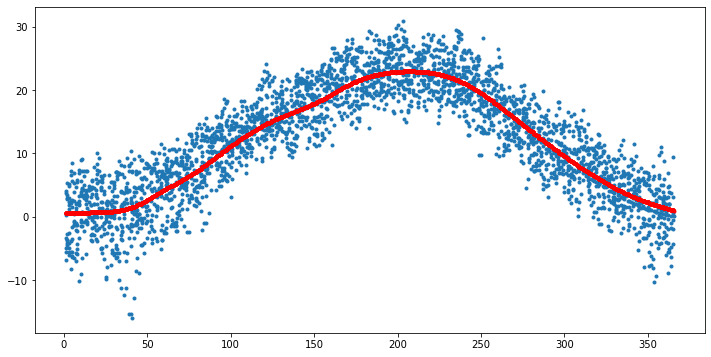

In [102]:
Y_pred = model.predict(X_train)

plt.figure(figsize=(12, 6))
plt.scatter(X_train, Y_train, marker='.')
plt.plot(X_train, Y_pred,'.', c='r')

In [103]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 1s 2ms/step - loss: 13.8076


13.807633399963379